In [1]:
import pandas as pd
import numpy as np
reviews = pd.read_csv('airline_comment_1000.csv')

In [2]:
import spacy
nlp = spacy.load('en_core_web_lg') 

In [3]:
reviews.groupby("airline")["airline"].count()

airline
alaska-airlines        460
american-airlines     1000
delta-air-lines       1000
southwest-airlines    1000
spirit-airlines       1000
united-airlines       1000
Name: airline, dtype: int64

In [4]:
#Create a list of attributes that we will map onto
attributes = ["customer service", 'entertainment', 'welcoming', 'wifi',  'comfort', 'seat', 'affordable', 'cheap', 'warm', 'respect', 'friendly', 'safety', 'baggage', 'on-time']

similarity_score_list = []
preference = nlp(str(attributes))

# calculate the similarity score between each review and the attributes
for review in reviews['header']:
    each_review = nlp(str(review))
    similarity_score_list.append(preference.similarity(each_review))  

In [5]:
type(reviews)

pandas.core.frame.DataFrame

<AxesSubplot:title={'center':'Average Similary Score by Airline'}, xlabel='Airline', ylabel='Similarity Score'>

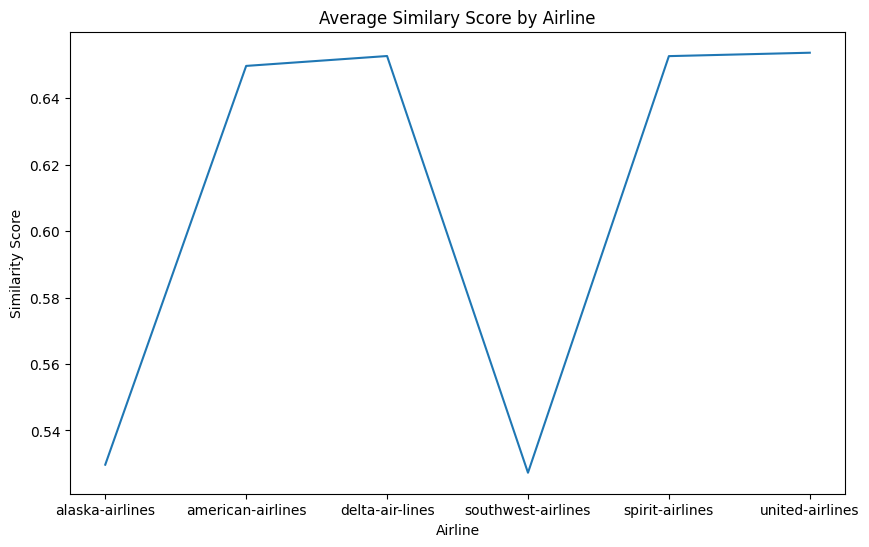

In [6]:
import matplotlib.pyplot as plt

#Add similarity score column to the DF
reviews['similarity_score'] = np.array(similarity_score_list)

#Group the data by airline and calculate mean similarity score
mean_similarity_scores = reviews.groupby('airline')[['similarity_score']].mean()

## Create the bar and line plot
mean_similarity_scores.plot(figsize = (10,6), kind='line', legend=False, title = 'Average Similary Score by Airline', xlabel = 'Airline', ylabel = 'Similarity Score') 

In [7]:
#Break down attributes into classes
service_attributes = ['customer service', 'welcoming', 'warm', 'respect', 'friendly']

amenities_attributes = ['entertainment', 'wifi',  'comfort', 'seat']

pricing_attributes = ['affordable', 'cheap']

logistics_attributes = ['safety', 'baggage', 'on-time']

In [8]:
#Determine the similarity score for service attributes

service_similarity_score_list = []
service_preference = nlp(str(service_attributes))

# calculate the similarity score between each review and the attributes
for review in reviews['header']:
    each_review = nlp(str(review))
    service_similarity_score_list.append(service_preference.similarity(each_review))
    
#Add the list to the main DF
reviews['service_similarity_score_list'] = np.array(service_similarity_score_list)

In [9]:
# Determine the similarity score for amenities attributes

amenities_similarity_score_list = []
amenities_preference = nlp(str(amenities_attributes))

# Calculate the similarity score between each review and the attributes
for review in reviews['header']:
    each_review = nlp(str(review))
    amenities_similarity_score_list.append(amenities_preference.similarity(each_review))
    
# Add the list to the main DF
reviews['amenities_similarity_score_list'] = np.array(amenities_similarity_score_list)

In [10]:
# Determine the similarity score for pricing attributes

pricing_similarity_score_list = []
pricing_preference = nlp(str(pricing_attributes))

# Calculate the similarity score between each review and the attributes
for review in reviews['header']:
    each_review = nlp(str(review))
    pricing_similarity_score_list.append(pricing_preference.similarity(each_review))
    
# Add the list to the main DF
reviews['pricing_similarity_score_list'] = np.array(pricing_similarity_score_list)

In [11]:
# Determine the similarity score for logistics attributes

logistics_similarity_score_list = []
logistics_preference = nlp(str(logistics_attributes))

# Calculate the similarity score between each review and the attributes
for review in reviews['header']:
    each_review = nlp(str(review))
    logistics_similarity_score_list.append(logistics_preference.similarity(each_review))
    
# Add the list to the main DF 
reviews['logistics_similarity_score_list'] = np.array(logistics_similarity_score_list)

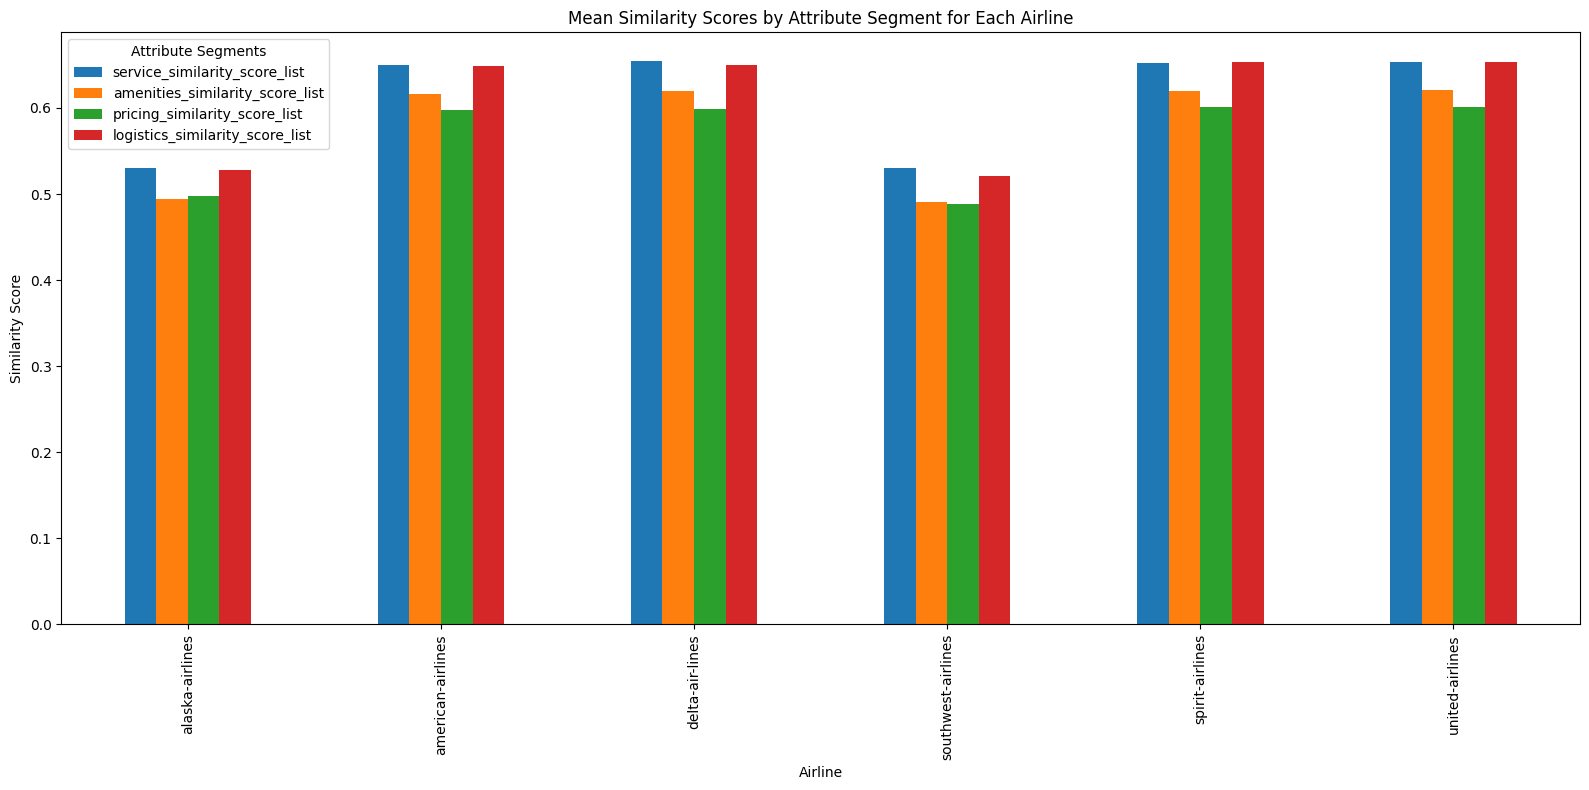

In [12]:
# Group the data by airline and calculate the mean for each attribute segment
mean_values_by_airline = reviews.groupby('airline')[['service_similarity_score_list', 
                                                     'amenities_similarity_score_list', 
                                                     'pricing_similarity_score_list', 
                                                     'logistics_similarity_score_list']].mean()


#Plot this data to socialize with relevant stakeholders
mean_values_by_airline.plot(kind='bar', figsize=(16, 8), title = 'Mean Similarity Scores by Attribute Segment for Each Airline', xlabel = 'Airline', ylabel = 'Similarity Score')
plt.legend(title="Attribute Segments", loc='upper left')
plt.tight_layout()